# Symbolic Aggregate approXimation *(SAX)* Encoding

In [2]:
!pip install git+https://github.com/nickprock/pynuTS.git@main

  Cloning https://github.com/nickprock/pynuTS.git (to revision main) to /tmp/pip-req-build-2ucyk7jb
  Created wheel for pynuTS: filename=pynuTS-0.1.5-py3-none-any.whl size=9351 sha256=7a2ed83f4c1629d9a9a161a822ac01659ff7d1d12c585ef8fe10956cc847dc0b
  Stored in directory: /tmp/pip-ephem-wheel-cache-6f5rz643/wheels/59/58/6e/2fb72676efefa1bcc454c7ea3f3939d5cc3245b098efa20f64
Successfully built pynuTS
  Attempting uninstall: pynuTS
    Found existing installation: pynuTS 0.2.0
    Uninstalling pynuTS-0.2.0:
      Successfully uninstalled pynuTS-0.2.0


In [291]:
import pandas as pd
import numpy as np
from pynuTS.anomaly_detection import SAXEncoding

In [292]:
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

Symbolic Aggregate approXimation Encoding (SAX Encoding)

* Developed in 2002 by Keogh e Lin
* Dimensionality Reduction for sequences

* In this example we will use it to find anomaly patterns. For more informations read this [KDNuggets article](https://www.kdnuggets.com/2019/09/time-series-baseball.html).

## Create dataset.

We Create 10 sequences with 12 observations.


In [438]:
# Some useful functions
def sigmoid(x, a, b, c):
    expo = a * (b - x)
    sig = 1 / ( 1 + np.exp( expo ) ) * c
    return sig


def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

In [430]:
time = np.arange(12)

np.random.seed(42)
a = 0.05
b = 10
c = 20

list_series = []
for i in range(10):
  noise = white_noise(time)
  temp = sigmoid(time, a, b, c) + noise
  list_series.append(temp)

### Create DataFrame

* every row is a period
* every column is a sequence

In [444]:
X = pd.DataFrame(list_series).T

In [445]:
X

,0,1,2,3,4,5,6,7,8,9
0,7.643533,7.874576,8.048052,8.719628,6.727173,8.762809,8.097454,6.486226,6.627164,7.657693
1,8.054128,9.030083,7.260499,7.145265,9.214411,8.212056,6.585746,6.941542,7.004216,7.195885
2,9.075451,8.990979,9.897565,7.793232,8.227281,9.401204,7.672400,10.649596,7.148239,9.082557
3,8.204876,9.196407,8.968070,9.335629,9.662514,7.649743,8.919126,7.010090,7.456593,9.635803
4,7.828728,7.001631,8.810996,7.676264,9.314481,9.700706,8.358006,8.664757,8.376081,9.229399
5,9.781482,9.174848,7.019601,8.188596,9.560671,8.677918,9.134630,8.705636,8.472158,8.537022
6,9.439399,8.400932,8.038363,6.862743,9.902219,7.342490,8.798739,9.265298,8.919691,8.748504
7,9.644907,10.295027,9.461218,9.392950,8.498114,10.730016,10.605346,8.726276,8.842736,9.621651
8,9.655883,9.548576,10.775606,11.362554,11.047209,9.973211,10.186995,8.993423,10.682549,8.191749
9,11.615331,10.544305,7.799118,9.410584,11.476798,8.640472,9.807745,11.596399,8.777385,9.398794


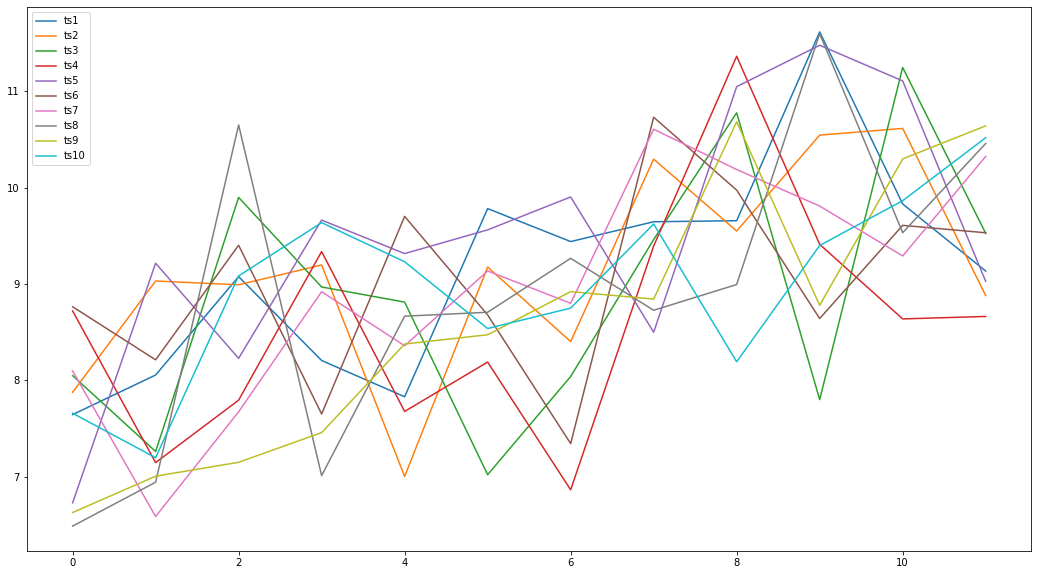

In [446]:
X.plot(figsize=(18,10))
plt.legend(["ts1", "ts2","ts3","ts4","ts5","ts6","ts7","ts8","ts9","ts10"])
plt.show()

## Anomaly detection with SAX Encoding

We choose a window size 4. We reduct the 12 periods in 3 periods, like quarters in a year.

In [434]:
sax = SAXEncoding(windows=4)

In [435]:
df, PAA, freq, isOutlier = sax.fit_transform(X)

## Dimensionality Reduction with **Piecewise Aggregate Approximation**

The **Piecewise Aggregate Approximation** is a sequence of labels, like 'AAA' in this case.

In [436]:
PAA

,0,1,2,sequence
0,A,B,C,ABC
1,C,A,B,CAB
2,C,A,A,CAA
3,C,A,B,CAB
4,B,B,C,BBC
5,B,C,A,BCA
6,A,C,B,ACB
7,B,B,B,BBB
8,A,B,C,ABC
9,B,C,A,BCA


### Plot the series

In blu the standard patterns

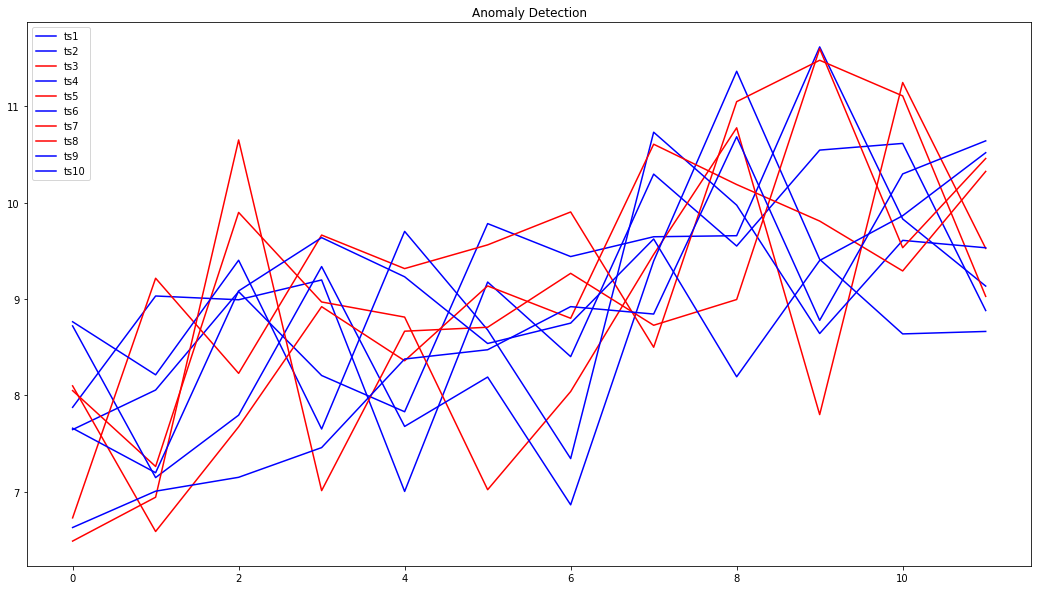

In [437]:
plt.figure(figsize=(18,10))
for i in range(df.shape[0]):
    if df.iloc[i,-1]:
        col = 'r'
    else:
        col = 'b'
    plt.plot(df.iloc[i,:-1], col)
plt.legend(["ts1", "ts2","ts3","ts4","ts5","ts6","ts7","ts8","ts9","ts10"])
plt.title("Anomaly Detection")
plt.show()

## Credits

pynuTS by Nicola Procopio 2020

Original repository https://github.com/nickprock/pynuTS/

<br>

* *The **sigmoid** function was created by [Piero Savastano](https://github.com/pieroit) for [covid19italia](https://github.com/ondata/covid19italia/blob/master/visualizzazione/analisi_predittiva.ipynb)*

* *The **white_noise** function was created by [Aurélien Géron](https://github.com/ageron) for an Udacity course*
